In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
df = pd.read_csv('all_merged.csv')

df

,pidlink,age,male,edu_level,rural,smoking,rural_no_migration,urban_no_migration,urban_to_rural_migration,rural_to_urban_migration,rural_to_rural_migration,urban_to_urban_migration,never_smoking,always_smoking,started_smoking
0,1060001.0,59.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1060004.0,28.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1060007.0,39.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1060008.0,16.0,0.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1065102.0,30.0,1.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79853,321280010.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79854,321280011.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79855,321290008.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79856,321291105.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df0 = df[['pidlink','age','male','edu_level','rural','smoking']].dropna()

df0

,pidlink,age,male,edu_level,rural,smoking
0,1060001.0,59.0,1.0,1.0,1.0,1.0
1,1060004.0,28.0,0.0,1.0,1.0,0.0
2,1060007.0,39.0,0.0,0.0,1.0,0.0
3,1060008.0,16.0,0.0,2.0,1.0,0.0
4,1065102.0,30.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...
36376,321291103.0,20.0,0.0,4.0,0.0,0.0
36377,321291104.0,19.0,1.0,4.0,0.0,1.0
36378,321300001.0,48.0,1.0,3.0,0.0,0.0
36379,321300002.0,58.0,0.0,3.0,0.0,0.0


,age,male,edu_level,rural,smoking
count,34074.000,34074.000,34074.000,34074.000,34074.000
mean,38.327,0.477,2.203,0.408,0.318
std,16.011,0.499,1.152,0.491,0.466
min,14.000,0.000,0.000,0.000,0.000
25%,26.000,0.000,1.000,0.000,0.000
50%,35.000,0.000,2.000,0.000,0.000
75%,48.000,1.000,3.000,1.000,1.000
max,110.000,1.000,4.000,1.000,1.000


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'male'}>],
       [<AxesSubplot: title={'center': 'edu_level'}>,
        <AxesSubplot: title={'center': 'rural'}>],
       [<AxesSubplot: title={'center': 'smoking'}>, <AxesSubplot: >]],
      dtype=object)

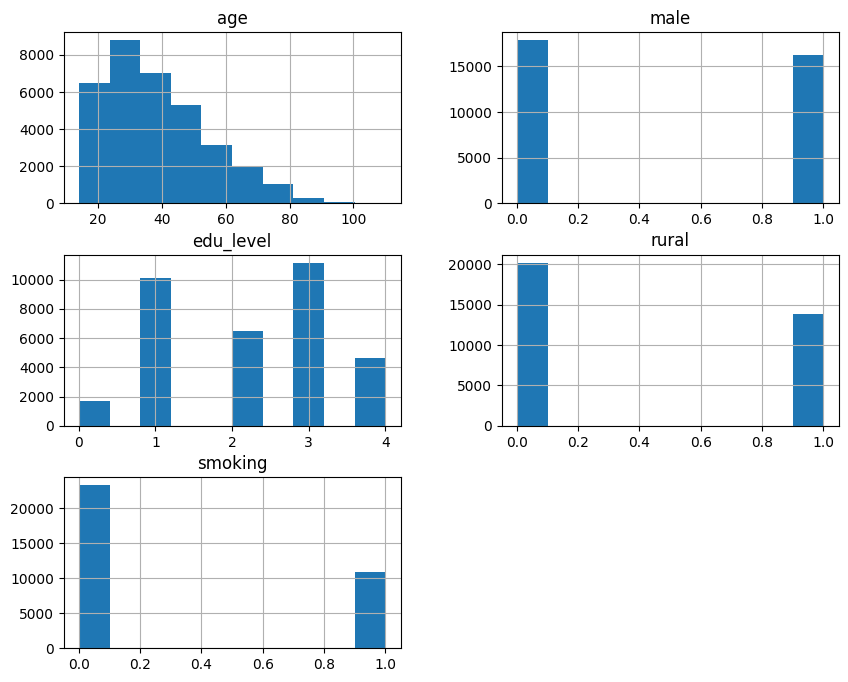

In [4]:
df1 = df0.drop(columns='pidlink')

display(df1.describe().round(3),df1.hist(figsize=(10,8)))

In [5]:
df0_age = df0[['pidlink','age']]

q1 = df0_age.quantile(0.25)
q3 = df0_age.quantile(0.75)
IQR = q3-q1

lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR

outliers = df0_age[(df0_age < lower_limit) | (df0_age > upper_limit)]

outliers.count()

pidlink      0
age        340
dtype: int64

In [6]:
df0_age_clean = df0_age[(df0_age >= lower_limit) & (df0_age <= upper_limit)]
# we only want values between the lower and upper limits, and outside of that will become null values

df0_age_new = df0_age_clean.dropna() # dropping the null values, which were previously outliers

df2 = pd.merge(df0_age_new,df0,how='left',on='pidlink')

df3 = df2.drop(columns=['pidlink','age_y'])
df4 = df3.rename(columns = {'age_x':'age'}, inplace = False)

df4

,age,male,edu_level,rural,smoking
0,59.0,1.0,1.0,1.0,1.0
1,28.0,0.0,1.0,1.0,0.0
2,39.0,0.0,0.0,1.0,0.0
3,16.0,0.0,2.0,1.0,0.0
4,30.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...
33729,20.0,0.0,4.0,0.0,0.0
33730,19.0,1.0,4.0,0.0,1.0
33731,48.0,1.0,3.0,0.0,0.0
33732,58.0,0.0,3.0,0.0,0.0


,age,male,edu_level,rural,smoking
count,33734.000,33734.000,33734.000,33734.000,33734.000
mean,37.837,0.477,2.220,0.407,0.318
std,15.318,0.499,1.144,0.491,0.466
min,14.000,0.000,0.000,0.000,0.000
25%,26.000,0.000,1.000,0.000,0.000
50%,35.000,0.000,2.000,0.000,0.000
75%,48.000,1.000,3.000,1.000,1.000
max,81.000,1.000,4.000,1.000,1.000


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'male'}>],
       [<AxesSubplot: title={'center': 'edu_level'}>,
        <AxesSubplot: title={'center': 'rural'}>],
       [<AxesSubplot: title={'center': 'smoking'}>, <AxesSubplot: >]],
      dtype=object)

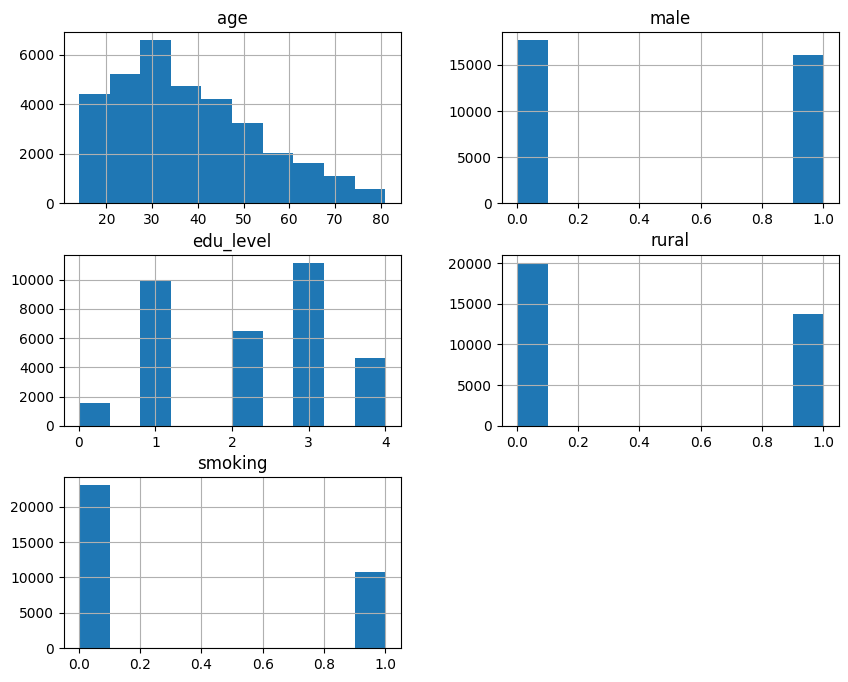

In [7]:
display(df4.describe().round(3),df4.hist(figsize=(10,8)))

In [8]:
df4.to_csv(r'C:\data_python\1st_analysis.csv',index=False)

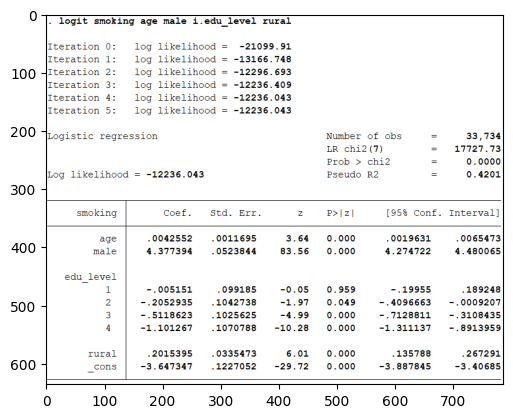

In [9]:
img = mpimg.imread('1st_analysis_logit_model.png')
imgplot = plt.imshow(img)

plt.show()